In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import normalize
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


In [3]:
"""
Unloading the pickled data from process-data.ipynb
"""

pickle_data = pickle.load(open('picklefiles/training.pickle', 'rb'))

In [4]:
# Initialising empty lists for data
Xt = []
yt = []

In [5]:
#Adding the pickled data into the lists
for imgs, labels in pickle_data:
    Xt.append(imgs)
    yt.append(labels)

In [6]:
Xt = np.array(Xt)

In [7]:
yt = np.array(yt[0])

In [8]:
print(yt)


[1 1 1 ... 3 3 3]


In [9]:
""""
Scikit-learn train test split for dividing the data for training and testing.
"""
X_train,X_test,y_train,y_test = train_test_split(Xt,yt, test_size=0.1,random_state=101)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)  

In [10]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
X_valid = normalize(X_valid, axis=1)

In [11]:
X_train.shape

(2757, 512, 512, 3)

In [12]:
print(y_train.shape)

(2757,)


In [13]:
y_train = to_categorical(y_train-1, 3);
y_test = to_categorical(y_test-1, 3);
y_valid = to_categorical(y_valid-1, 3);

In [14]:
with tf.device('/cpu:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

In [15]:
model=Sequential([
    layers.Conv2D(16,4,padding="same",activation="relu",input_shape=(512,512,1)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,4,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64,4,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(128,activation="relu"),
    layers.Dense(3)
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 512, 512, 16)      784       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 256, 256, 16)      0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 256, 256, 32)      8224      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 128, 128, 32)      0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 128, 128, 64)      32832     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 64, 64, 64)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 64, 64, 64)        0

In [16]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history=model.fit(X_train,y_train,validation_data=(X_valid, y_valid) ,epochs=5)

Epoch 1/5
87/87 [==============================] - 35s 245ms/step - loss: 0.6090 - accuracy: 0.7258 - val_loss: 0.2624 - val_accuracy: 0.9020
Epoch 2/5
87/87 [==============================] - 16s 189ms/step - loss: 0.2464 - accuracy: 0.8992 - val_loss: 0.1765 - val_accuracy: 0.9085
Epoch 3/5
87/87 [==============================] - 16s 188ms/step - loss: 0.0910 - accuracy: 0.9677 - val_loss: 0.1953 - val_accuracy: 0.9020
Epoch 4/5
87/87 [==============================] - 16s 189ms/step - loss: 0.0539 - accuracy: 0.9775 - val_loss: 0.2109 - val_accuracy: 0.9085
Epoch 5/5
87/87 [==============================] - 16s 190ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.1376 - val_accuracy: 0.9542


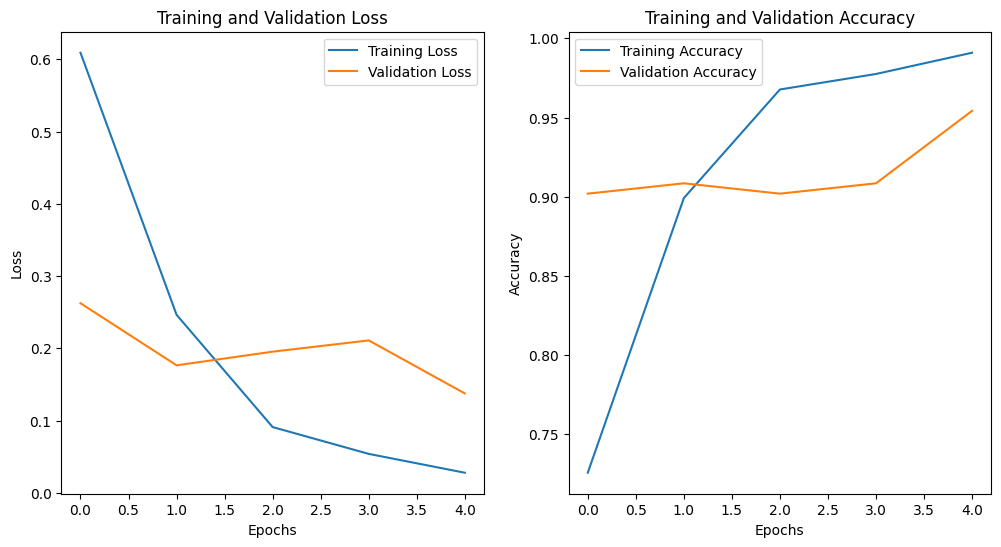

In [18]:
loss = history.history['loss']
accuracy = history.history['accuracy']
if 'val_loss' in history.history:
    val_loss = history.history['val_loss']
if 'val_accuracy' in history.history:
    val_accuracy = history.history['val_accuracy']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [22]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.21348780393600464
Test accuracy:  0.9220778942108154


In [23]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.94      0.91      0.92        64
           2       0.98      0.98      0.98        43

    accuracy                           0.92       154
   macro avg       0.92      0.93      0.92       154
weighted avg       0.92      0.92      0.92       154

